In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
exits = pd.read_csv('../hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## Sum by Time of Day

In [3]:
x_sm = exits.sum()
x_sm

H05     10761
H06     83330
H07    268670
H08    490565
H09    460103
H10    224547
H11    175449
H12    181028
H13    188577
H14    189407
H15    215334
H16    290592
H17    421122
H18    488271
H19    316651
H20    181230
H21    134906
H22    126109
H23    103350
H00     49682
H01      8436
dtype: int64

## List of Station Totals

In [4]:
totals = pd.DataFrame().assign(Total = exits.apply(sum, axis=1))

In [5]:
def printIndex(row):
    print(row.name, "has total", totals.loc[row.name, 'Total'])

temp = totals.sort_values('Total', axis=0).apply(printIndex, axis=1)

Roding Valley has total 596
Chigwell has total 723
Grange Hill has total 1085
North Ealing has total 1214
Chorleywood has total 1315
Theydon Bois has total 1457
Moor Park has total 1584
Kensington (Olympia) has total 1646
Ruislip Gardens has total 1714
Croxley has total 1850
Upminster Bridge has total 1925
Fairlop has total 1930
Ickenham has total 1950
Chesham has total 1983
Mill Hill East has total 2099
South Kenton has total 2163
West Acton has total 2551
West Harrow has total 2584
West Ruislip has total 2672
North Wembley has total 2674
Barkingside has total 2693
West Finchley has total 2694
Hillingdon has total 2701
Cockfosters has total 2731
Sudbury Town has total 2834
Heathrow Terminal 4 has total 2850
Watford has total 2876
Chalfont & Latimer has total 2958
Sudbury Hill has total 3091
Park Royal has total 3181
South Ruislip has total 3189
North Harrow has total 3197
Ruislip has total 3212
Ruislip Manor has total 3259
Northwood Hills has total 3292
Kenton has total 3292
Wimbledon

## Create Tall Data

In [6]:
sexits = exits.stack().reset_index()
sexits = sexits.rename(columns={'level_1':'Hour', 0:'Count'})
sexits

,Station,Hour,Count
0,Acton Town,H05,30
1,Acton Town,H06,208
2,Acton Town,H07,710
3,Acton Town,H08,812
4,Acton Town,H09,448
...,...,...,...
5623,Woodside Park,H21,342
5624,Woodside Park,H22,288
5625,Woodside Park,H23,202
5626,Woodside Park,H00,62


## Calculating the Median Properly

In [7]:
from scipy import stats
import numpy as np

tt = exits.sum()
xk = np.arange(21)
custm = stats.rv_discrete(name='custm', values=(xk, tt.values / tt.sum()))
custm

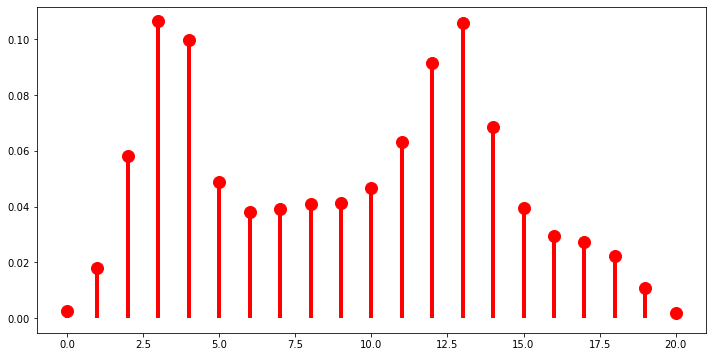

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

In [9]:
custm.median()

10.0

## Code for Section 4

array([[<AxesSubplot:title={'center':'amfraction'}>],
       [<AxesSubplot:title={'center':'pmfraction'}>],
       [<AxesSubplot:title={'center':'pm_minus_am'}>]], dtype=object)

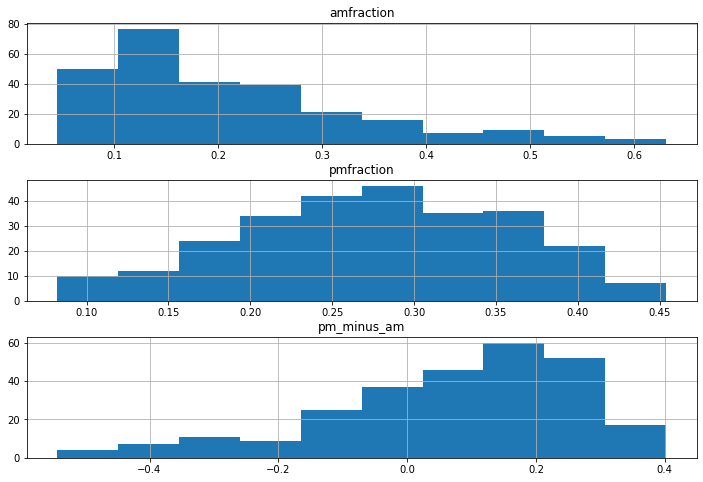

In [10]:
peak_counts = pd.DataFrame().assign(ampeak = exits.H07 + exits.H08 + exits.H09, 
                                    pmpeak = exits.H16 + exits.H17 + exits.H17)

peaks = peak_counts.assign(amfraction = peak_counts.ampeak / totals.Total,
                           pmfraction = peak_counts.pmpeak / totals.Total)
                           
peaks = peaks.assign(pm_minus_am = peaks.pmfraction - peaks.amfraction)
peaks.hist(column=['amfraction', 'pmfraction', 'pm_minus_am'], layout=(3,1), figsize=(12,8))